In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\dukuku1\\OneDrive - Louisiana State University\\Documents\\LSU\\Classes\\2nd year\\Spring\\Che 7700\\Project\\ezyzip (1)'

In [2]:
from src.data_preprocess import DataPreprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
###############################
### 1. Data Preprocessing  ###
###############################

# Load dataset
file_path = "data/Load_data_new.csv"
preprocessor = DataPreprocessing()

data = preprocessor.load_data(file_path)

c:\Users\dukuku1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


K-Means Silhouette Score: 0.40578
DBSCAN Silhouette Score: 0.6155083
HDBSCAN Silhouette Score: 0.34230685


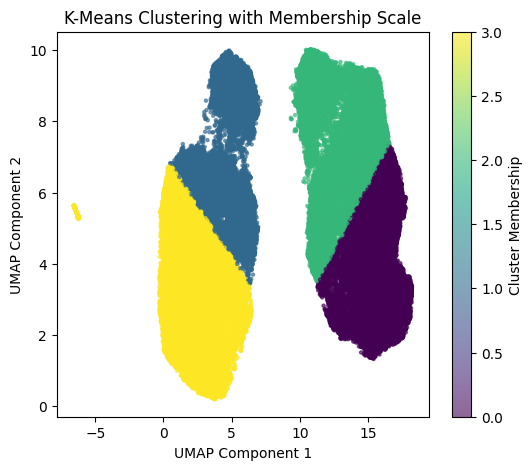

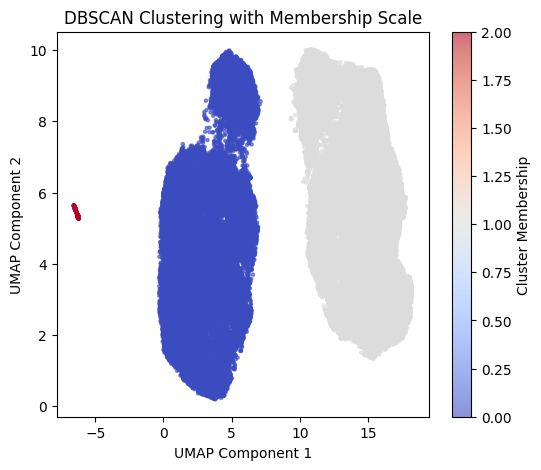

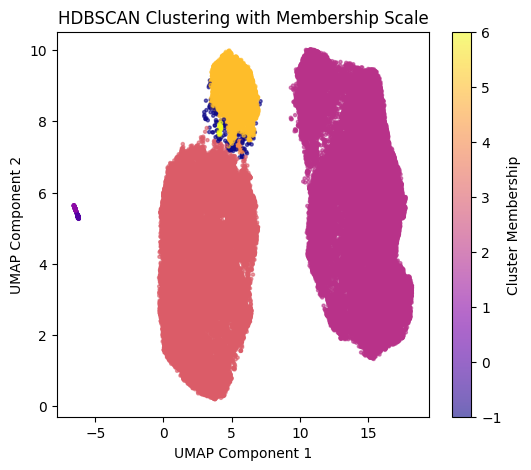

In [4]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dimensionality Reduction with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_reducer.fit_transform(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_umap)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['dbscan_cluster'] = dbscan.fit_predict(data_umap)

# HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15)
data['hdbscan_cluster'] = hdbscan_model.fit_predict(data_umap)

# Evaluation Metrics
print("K-Means Silhouette Score:", silhouette_score(data_umap, data['kmeans_cluster']))
print("DBSCAN Silhouette Score:", silhouette_score(data_umap, data['dbscan_cluster']) if len(set(data['dbscan_cluster'])) > 1 else 'N/A')
print("HDBSCAN Silhouette Score:", silhouette_score(data_umap, data['hdbscan_cluster']) if len(set(data['hdbscan_cluster'])) > 1 else 'N/A')

save_path = "plots"
# Visualization with Membership Scale
def plot_clusters(data_umap, labels, title, cmap):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap=cmap, s=5, alpha=0.6)
    plt.colorbar(scatter, label='Cluster Membership')
    plt.title(title)
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.savefig(os.path.join(save_path, title + ".png"))
    plt.show()

plot_clusters(data_umap, data['kmeans_cluster'], 'K-Means Clustering with Membership Scale', 'viridis')
plot_clusters(data_umap, data['dbscan_cluster'], 'DBSCAN Clustering with Membership Scale', 'coolwarm')
plot_clusters(data_umap, data['hdbscan_cluster'], 'HDBSCAN Clustering with Membership Scale', 'plasma')
